# Simulate Micro-C Distribution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import utils
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist, cdist, squareform
import matplotlib.pyplot as plt
import sys
import os
import scipy
import scipy.special 
import scipy.spatial
from scipy.ndimage import gaussian_filter
import pickle
import matplotlib as mpl
from cycler import cycler
import utility
from utility import plots_dir

In [2]:
plt.rcdefaults()
# Could use Style Guide Instead of Custom
thickness = 3
fsize = 18
mpl.rcParams['lines.linewidth'] = thickness
mpl.rcParams['lines.linestyle'] = '-'
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['axes.titlesize'] = fsize
mpl.rcParams['axes.labelsize'] = fsize

mpl.rcParams['xtick.labelsize'] = fsize-8
mpl.rcParams['ytick.labelsize'] = fsize-8
#Set Border Width
mpl.rcParams['axes.linewidth'] = 2

#Tick Mark Settings
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = thickness
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = thickness

# Fonts
mpl.rcParams['font.sans-serif'] = 'Helvetica'
# mpl.rcParams['font.weight'] = 'bold'

mpl.rcParams['axes.prop_cycle'] = cycler(color=['#0072B2', '#D55E00', '#009E73', '#CC79A7','#000000','#56B4E9','#E69F00','#F0E442'])

In [3]:
positions = pd.read_csv('/ru-auth/local/home/abrenner/mystore/exp_data/microc/struct_coords/song_entry_exits.csv')
positions['sep'] = np.sqrt((positions['Entry X'] - positions['Exit X'])**2 + (positions['Entry Y'] - positions['Exit Y'])**2 +  (positions['Entry Z'] - positions['Exit Z'])**2)
positions

,Nucleosome,Entry X,Entry Y,Entry Z,Exit X,Exit Y,Exit Z,sep
0,1,33.7755,-89.3745,-28.1175,-30.5390,-110.7420,-0.1340,73.321220
1,2,-95.4990,-4.6335,-86.8530,-46.9060,-51.0930,-139.8305,85.594277
2,3,25.0715,-66.5935,38.5865,-56.6725,-85.1220,21.2370,85.594346
3,4,-55.4465,14.5860,-94.7040,4.6205,-26.6255,-103.0430,73.321014
4,5,6.5155,-23.6030,34.1400,-61.6530,-27.8335,7.4715,73.321555
5,6,-17.0080,59.3725,-107.2640,38.8420,-5.8675,-105.4610,85.899540
6,7,-38.6945,16.7430,70.9540,-87.7565,5.8485,2.0340,85.297927
7,8,26.3390,67.7525,-78.2865,55.8135,13.7795,-38.0090,73.512638
8,9,-36.2690,57.3980,50.8005,-61.7685,55.7875,-17.9240,73.320359
9,10,75.1955,94.0430,-65.4100,88.0440,25.9740,-15.1315,85.594394


In [4]:
limit1 = 0
limit = 12
entries = np.array(positions[['Entry X', 'Entry Y','Entry Z']])[limit1:limit,:]
exits = np.array(positions[['Exit X', 'Exit Y','Exit Z']])[limit1:limit,:]

In [5]:
# odd_ent = entries[::2,:]
# even_ent = entries[1::2,:]
# odd_exit = exits[::2,:]
# even_exit = exits[1::2,:]
# continuous = np.vstack((entries,exits))
# continuous

In [6]:
# even_ent

In [7]:
# # Look at one nucleosome
# %matplotlib notebook 
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# # ax.plot(xs = entries[:,0], ys = entries[:,1], zs = entries[:,2],  marker = 'o', color = 'g')
# # ax.plot(xs = exits[:,0], ys = exits[:,1], zs = exits[:,2], color = 'b', marker = 'o')
# ax.plot(xs = odd_ent[:,0], ys = odd_ent[:,1], zs = odd_ent[:,2],  marker = 'o', color = 'g')
# ax.plot(xs = odd_exit[:,0], ys = odd_exit[:,1], zs = odd_exit[:,2], color = 'b', marker = 'o')
# ax.plot(xs = even_ent[:,0], ys = even_ent[:,1], zs = even_ent[:,2],  marker = 'o', color = 'orange')
# ax.plot(xs = even_exit[:,0], ys = even_exit[:,1], zs = even_exit[:,2], color = 'purple', marker = 'o')

In [8]:
# #for sigmoid
# gamma = 0.1
# len_scale = 50
# wrap_amount = 127

#### Read in Standard Deviation from Tapestation

In [9]:
# sd_file = pd.read_csv('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/tapestation_inference/tapestation_parameters.csv')
# mononuc_sd = sd_file['Whole Fragment SD'][0]

#### Let's plot this series to ensure the results are expected

Sigma Function Quality Control

In [10]:
# multiple = 1
# d = np.linspace(0,(1/multiple)*40)
# liklihoods = utils.sigmoid(d, gamma = multiple*gamma, len_scale = (1/multiple)*len_scale)

In [11]:
# # %matplotlib notebook
# sns.scatterplot(x=d, y=liklihoods)
# plt.show()

# Focus on In-In and out-out contacts

In [12]:
# def make_contact_curve(scaling_factor, gamma_mult):
#     pairwise_in_in = scipy.spatial.distance.pdist(entries)
#     multiple = scaling_factor
#     dist_mat = squareform([utils.sigmoid(i,gamma_mult*multiple*gamma, len_scale = (1/multiple)*len_scale) for i in pairwise_in_in])
    
#     num_nucs = 12
#     n_plus_1_ins = np.sum(np.diag(dist_mat,1)) * num_nucs / 11. #normalization term to account for long fibers. 
#     n_plus_2_ins = np.sum(np.diag(dist_mat,2)) * num_nucs / 10.
#     n_plus_3_ins = np.sum(np.diag(dist_mat,3)) * num_nucs / 9.
#     n_plus_4_ins = np.sum(np.diag(dist_mat,4)) * num_nucs / 8.
#     n_plus_5_ins = np.sum(np.diag(dist_mat,5)) * num_nucs / 7.
#     n_plus_6_ins = np.sum(np.diag(dist_mat,6)) * num_nucs / 6.
#     n_plus_7_ins = np.sum(np.diag(dist_mat,7)) * num_nucs / 5.
#     n_plus_8_ins = np.sum(np.diag(dist_mat,8)) * num_nucs / 4.
#     frequency_of_in_contacts = [n_plus_1_ins, n_plus_2_ins, n_plus_3_ins, n_plus_4_ins, n_plus_5_ins,n_plus_6_ins,n_plus_7_ins,n_plus_8_ins]
    
#     pairwise_out_out = scipy.spatial.distance.pdist(exits)
#     dist_mat = squareform([utils.sigmoid(i,gamma_mult*multiple*gamma, len_scale = (1/multiple)*len_scale) for i in pairwise_out_out])
#     n_plus_1_outs = np.sum(np.diag(dist_mat,1)) * num_nucs / 11. 
#     n_plus_2_outs = np.sum(np.diag(dist_mat,2)) * num_nucs / 10.
#     n_plus_3_outs = np.sum(np.diag(dist_mat,3)) * num_nucs / 9.
#     n_plus_4_outs = np.sum(np.diag(dist_mat,4)) * num_nucs / 8.
#     n_plus_5_outs = np.sum(np.diag(dist_mat,5)) * num_nucs / 7.
#     n_plus_6_outs = np.sum(np.diag(dist_mat,6)) * num_nucs / 6.
#     n_plus_7_outs = np.sum(np.diag(dist_mat,7)) * num_nucs / 5.
#     n_plus_8_outs = np.sum(np.diag(dist_mat,8)) * num_nucs / 4.
#     frequency_of_out_contacts = [n_plus_1_outs, n_plus_2_outs, n_plus_3_outs, n_plus_4_outs, n_plus_5_outs,n_plus_6_outs,n_plus_7_outs,n_plus_8_outs]
#     frequency_of_contacts = np.array(frequency_of_in_contacts) + np.array(frequency_of_out_contacts)
#     return frequency_of_contacts
    
# def make_contact_curve_outward(scaling_factor, gamma_mult,max_peaks=8):
#     multiple = scaling_factor
# #     pairwise_in_out = cdist(entries, exits)
# #     dist_mat = squareform([utils.sigmoid(i,gamma_mult*multiple*gamma, len_scale = (1/multiple)*len_scale) for i in pairwise_in_out])
#     pairwise_in_out = cdist(entries, exits)
#     num_nucs=12
#     normalization = [num_nucs/(num_nucs - i) for i in np.linspace(1,max_peaks-1,max_peaks-1)]
#     dist_mat = [utils.sigmoid(i,gamma_mult*multiple*gamma, len_scale = (1/multiple)*len_scale) for i in pairwise_in_out]
#     probs = [list(normalization[i-1]*np.diag(dist_mat,i)) for i in range(0,max_peaks)] #start at 1 if you dont want the 0th peak
#     frequency_of_contacts = [np.sum(probs[i]) for i in range(0,len(probs))]
#     return frequency_of_contacts
    

In [13]:
# def make_contact_curve_in(scaling_factor, gamma_mult,max_peaks=8):
#     multiple = scaling_factor
# #     pairwise_in_out = cdist(entries, exits)
# #     dist_mat = squareform([utils.sigmoid(i,gamma_mult*multiple*gamma, len_scale = (1/multiple)*len_scale) for i in pairwise_in_out])
#     pairwise_in_out = cdist(exits, entries)
#     num_nucs=12
#     normalization = [num_nucs/(num_nucs - i) for i in np.linspace(1,max_peaks-1,max_peaks-1)]
#     dist_mat = [utils.sigmoid(i,gamma_mult*multiple*gamma, len_scale = (1/multiple)*len_scale) for i in pairwise_in_out]
#     probs = [list(normalization[i-1]*np.diag(dist_mat,i)) for i in range(0,max_peaks)] #start at 1 if you dont want the 0th peak
#     frequency_of_contacts = [np.sum(probs[i]) for i in range(0,len(probs))]
#     return frequency_of_contacts

In [14]:
# pairwise_in_in = scipy.spatial.distance.pdist(entries)
# pairwise_in_in

In [15]:
# multiple = 4
# gamma_mult = 1
# dist_mat = squareform([utils.sigmoid(i,gamma_mult*multiple*gamma, len_scale = (1/multiple)*len_scale) for i in pairwise_in_in])
# dist_mat

In [16]:
# num_nucs = 12
# n_plus_1_ins = np.sum(np.diag(dist_mat,1)) * num_nucs / 11. #normalization term to account for long fibers. 
# n_plus_2_ins = np.sum(np.diag(dist_mat,2)) * num_nucs / 10.
# n_plus_3_ins = np.sum(np.diag(dist_mat,3)) * num_nucs / 9.
# n_plus_4_ins = np.sum(np.diag(dist_mat,4)) * num_nucs / 8.
# n_plus_5_ins = np.sum(np.diag(dist_mat,5)) * num_nucs / 7.
# n_plus_6_ins = np.sum(np.diag(dist_mat,5)) * num_nucs / 6.
# n_plus_7_ins = np.sum(np.diag(dist_mat,5)) * num_nucs / 5.
# n_plus_8_ins = np.sum(np.diag(dist_mat,5)) * num_nucs / 4.
# frequency_of_in_contacts = [n_plus_1_ins, n_plus_2_ins, n_plus_3_ins, n_plus_4_ins, n_plus_5_ins,n_plus_6_ins,n_plus_7_ins,n_plus_8_ins]

In [17]:
# pairwise_out_out = scipy.spatial.distance.pdist(exits)
# pairwise_out_out
# dist_mat = squareform([utils.sigmoid(i,gamma_mult*multiple*gamma, len_scale = (1/multiple)*len_scale) for i in pairwise_out_out])
# dist_mat
# n_plus_1_outs = np.sum(np.diag(dist_mat,1)) * num_nucs / 11. 
# n_plus_2_outs = np.sum(np.diag(dist_mat,2)) * num_nucs / 10.
# n_plus_3_outs = np.sum(np.diag(dist_mat,3)) * num_nucs / 9.
# n_plus_4_outs = np.sum(np.diag(dist_mat,4)) * num_nucs / 8.
# n_plus_5_outs = np.sum(np.diag(dist_mat,5)) * num_nucs / 7.
# n_plus_6_outs = np.sum(np.diag(dist_mat,5)) * num_nucs / 6.
# n_plus_7_outs = np.sum(np.diag(dist_mat,5)) * num_nucs / 5.
# n_plus_8_outs = np.sum(np.diag(dist_mat,5)) * num_nucs / 4.
# frequency_of_out_contacts = [n_plus_1_outs, n_plus_2_outs, n_plus_3_outs, n_plus_4_outs, n_plus_5_outs,n_plus_6_outs,n_plus_7_outs,n_plus_8_outs]
# frequency_of_contacts = np.array(frequency_of_in_contacts) + np.array(frequency_of_out_contacts)

In [18]:
# fig, ax = plt.subplots(figsize=(3,2.5))

# freq_of_contact_original = make_contact_curve(scaling_factor=1, gamma_mult=1)

# xvals = np.linspace(1,5,5)
# ax.plot(['N+1','N+2','N+3','N+4','N+5','N+6','N+7','N+8'],freq_of_contact_original, marker = 'o', color='#00953C')
# ax.set_ylabel('Contact Prob.', weight='bold')
# ax.set_xlabel('Neighboring Nuc.', weight='bold')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# for label in ax.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False)
# plt.tight_layout()
# # plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/figures/song_contact_prob_curve.pdf')
# # plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/figures/song_contact_prob_curve_tandem_poster.pdf', transparent=True)
# plt.show()

In [19]:
# fig, ax = plt.subplots(figsize=(3,2.5))

# freq_of_contact_outward= make_contact_curve_outward(scaling_factor=1, gamma_mult=1,max_peaks=9)
# freq_of_contact_outward

# xvals = np.linspace(1,5,5)
# ax.plot(['N+0', 'N+1','N+2','N+3','N+4','N+5','N+6','N+7','N+8'],freq_of_contact_outward, marker = 'o', color ='#F39632')
# ax.set_ylabel('Contact Prob.', weight='bold')
# ax.set_xlabel('Neighboring Nuc.', weight='bold')
# # ax.set_title('Outward Contacts (Entry-Exit)', weight='bold')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# for label in ax.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False)
# plt.tight_layout()
# # plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/figures/song_contact_prob_curve_outwards_poster.pdf', transparent=True)
# plt.show()

In [20]:
# fig, ax = plt.subplots(figsize=(3,2.5))

# freq_of_contact_outward = make_contact_curve_in(scaling_factor=1, gamma_mult=1,max_peaks=9)
# freq_of_contact_outward

# xvals = np.linspace(1,5,5)
# ax.plot(['N+1','N+2','N+3','N+4','N+5','N+6','N+7','N+8', 'N+9'],freq_of_contact_outward, marker = 'o', color ='#3376BF')
# ax.set_ylabel('Contact Prob.', weight='bold')
# ax.set_xlabel('Neighboring Nuc.', weight='bold')
# # ax.set_title('Outward Contacts (Entry-Exit)', weight='bold')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# for label in ax.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False)
# plt.tight_layout()
# # plt.savefig('/ru-auth/local/home/abrenner/mystore/analysis/micro_c/simulated_contact_prob_curves/figures/song_contact_prob_curve_inward_poster.pdf', transparent=True)
# plt.show()

# Now plot only the distances, not the predicted Micro-C signal

In [21]:
# tandem_n1 = 0.1 * np.concatenate([np.diagonal(squareform(pdist(entries)), offset = 1),np.diagonal(squareform(pdist(exits)), offset = 1)]) # 0.1 to convert ang to nanometer
# tandem_n2 = 0.1 * np.concatenate([np.diagonal(squareform(pdist(entries)), offset = 1),np.diagonal(squareform(pdist(exits)), offset = 2)]) # 0.1 to convert ang to nanometer
# tandem_n3 = 0.1 * np.concatenate([np.diagonal(squareform(pdist(entries)), offset = 1),np.diagonal(squareform(pdist(exits)), offset = 3)]) # 0.1 to convert ang to nanometer
# tandem_n4 = 0.1 * np.concatenate([np.diagonal(squareform(pdist(entries)), offset = 1),np.diagonal(squareform(pdist(exits)), offset = 4)]) # 0.1 to convert ang to nanometer

In [22]:
# Dictionary to store tandem distances for n1, n2, n3, and n4
all_distances = {}

# Compute tandem distances using a loop
for offset in range(0, 13):  # For offsets n1 to n4
    all_distances[f'tandem_n{offset}'] = 0.1 * np.concatenate([
        np.diagonal(squareform(pdist(entries)), offset=offset),
        np.diagonal(squareform(pdist(exits)), offset=offset)
    ])  # 0.1 to convert angstroms to nanometers
    
    all_distances[f'ent_ex_n{offset}'] = 0.1 * np.diagonal(cdist(entries, exits), offset=offset)
    all_distances[f'ex_ent_n{offset}'] = 0.1 * np.diagonal(cdist(exits, entries), offset=offset)


In [23]:
tandem_means = []
tandem_stds = []
ext_entry_dists = []
ext_entry_stds = []
entry_ext_dists = []
entry_ext_stds = []
for i in range(0, 12):
    tandem_means.append(np.mean(all_distances['tandem_n'+str(i)]))
    tandem_stds.append(np.std(all_distances['tandem_n'+str(i)]))
    entry_ext_dists.append(np.mean(all_distances['ent_ex_n'+str(i)]))
    entry_ext_stds.append(np.std(all_distances['ent_ex_n'+str(i)]))
    ext_entry_dists.append(np.mean(all_distances['ex_ent_n'+str(i)]))
    ext_entry_stds.append(np.std(all_distances['ex_ent_n'+str(i)]))
# tandem_means = np.array(tandem_means)
# entry_ext_dists = np.array(entry_ext_dists)

/tmp/ipykernel_35664/3590383266.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax[i].set_xticklabels(labels, rotation=90) for i in range(0,3)]


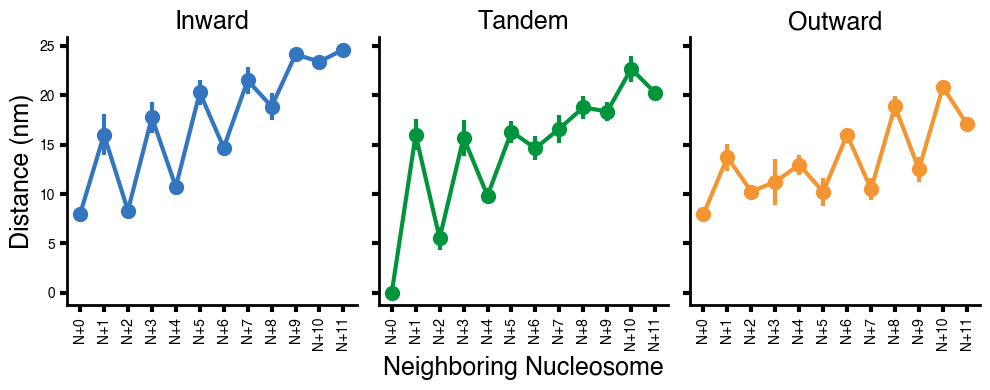

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(10,4), sharey = True)

labels = ['N+0','N+1','N+2','N+3','N+4','N+5','N+6','N+7', 'N+8', 'N+9', 'N+10', 'N+11']
ax[0].errorbar(labels, ext_entry_dists,yerr= ext_entry_stds, marker = 'o', color = '#3376BF')
ax[0].set_title('Inward')
[ax[i].set_xticklabels(labels, rotation=90) for i in range(0,3)]



ax[1].errorbar(labels, tandem_means,yerr = tandem_stds, marker = 'o', color = '#00953C')
ax[1].set_title('Tandem')
 
ax[2].errorbar(labels, entry_ext_dists, yerr= entry_ext_stds, marker = 'o', color = '#F39632')
ax[2].set_title('Outward')

[ax[i].spines['right'].set_visible(False) for i in range(0,3)]
[ax[i].spines['top'].set_visible(False) for i in range(0,3)]

ax[0].set_ylabel('Distance (nm)')
ax[1].set_xlabel('Neighboring Nucleosome')
plt.tight_layout()
plt.savefig(plots_dir + 'micro_c/song_dists.pdf')
plt.show()

In [25]:
# plt.plot(utils.sigmoid(all_distances['tandem_n1']))

In [26]:
tandem_means_sig = []
tandem_stds_sig = []
ext_entry_dists_sig = []
ext_entry_stds_sig = []
entry_ext_dists_sig = []
entry_ext_stds_sig = []
for i in range(0, 12):
    tandem_means_sig.append(np.mean(utils.sigmoid(all_distances['tandem_n'+str(i)])))
    tandem_stds_sig.append(np.std(utils.sigmoid(all_distances['tandem_n'+str(i)])))
    entry_ext_dists_sig.append(np.mean(utils.sigmoid(all_distances['ent_ex_n'+str(i)])))
    entry_ext_stds_sig.append(np.std(utils.sigmoid(all_distances['ent_ex_n'+str(i)])))
    ext_entry_dists_sig.append(np.mean(utils.sigmoid(all_distances['ex_ent_n'+str(i)])))
    ext_entry_stds_sig.append(np.std(utils.sigmoid(all_distances['ex_ent_n'+str(i)])))

/tmp/ipykernel_35664/2457660879.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax[i].set_xticklabels(labels, rotation=90) for i in range(0,3)]


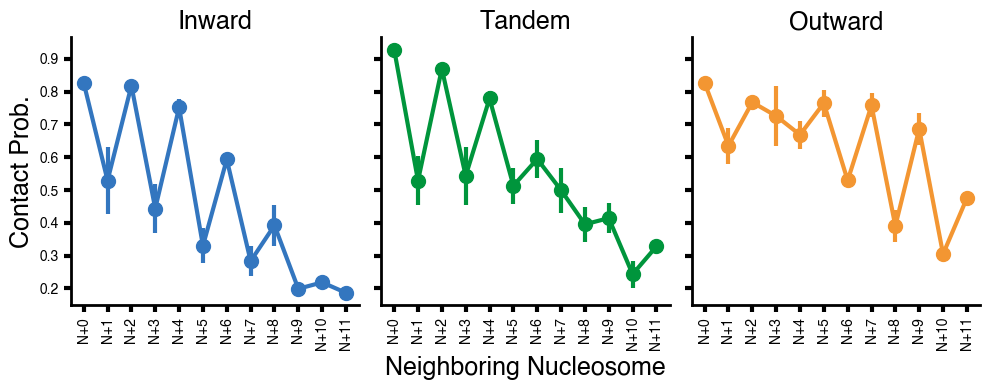

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(10,4), sharey = True)

labels = ['N+0','N+1','N+2','N+3','N+4','N+5','N+6','N+7', 'N+8', 'N+9', 'N+10', 'N+11']
ax[0].errorbar(labels, ext_entry_dists_sig,yerr= ext_entry_stds_sig, marker = 'o', color = '#3376BF')
ax[0].set_title('Inward')
[ax[i].set_xticklabels(labels, rotation=90) for i in range(0,3)]



ax[1].errorbar(labels, tandem_means_sig,yerr = tandem_stds_sig, marker = 'o', color = '#00953C')
ax[1].set_title('Tandem')
 
ax[2].errorbar(labels, entry_ext_dists_sig, yerr= entry_ext_stds_sig, marker = 'o', color = '#F39632')
ax[2].set_title('Outward')

[ax[i].spines['right'].set_visible(False) for i in range(0,3)]
[ax[i].spines['top'].set_visible(False) for i in range(0,3)]

ax[0].set_ylabel('Contact Prob.')
ax[1].set_xlabel('Neighboring Nucleosome')
plt.tight_layout()
# plt.savefig(plots_dir + 'micro_c/song_microc_sig.pdf')
plt.show()